# Exploring FIFA 19 player dataset

**Harry Odell. Student ID: 201411246**

In this notebook, I will investigate data pertaining to the qualities of footballers. I will explore the data visually, before performing some clustering and regression analysis to explore some factors in what makes players rank highly. 

## Data

The data used in this notebook was obtained and downloaded from the Kaggle data science platform. Key variables will be selected that describe their individual qualities.


## Import libraries

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import statsmodels.formula.api as sm
from plotly.offline import init_notebook_mode, iplot
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import preprocessing
init_notebook_mode(connected=True)

/Users/harryodell-mac/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



### Import data

In [3]:
data = pd.read_csv("data.csv") # downloaded from here: https://www.kaggle.com/karangadiya/fifa19
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.shape

(18207, 89)

We can see that there are 18207 players on FIFA 19, each having up to 89 descriptive variables. The variables include data not relevant to the research investigation, eg Photo and Flag, and so I will choose specific variables at a later stage.

In [5]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


'Overall' will be our dependent variable for subsequent regression analysis, it is a measure a players' ranking. The mean is **66** with a standard deviation of **6.9**.

In [6]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
len(data[data.isnull().any(axis=1)])

18207

Observe that all footballers have at least some missing data. Let's investigate..

In [8]:
data.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

The variables identified as having numerous missing values, notably 'Joined', 'Loaned From' and 'Release Clause', are not necessary for the analysis and so we can drop missing observations at a later stage without significant impact on the data and results obtained.

Let's create a dataframe containing only variables I think are relevant to this analysis.

In [9]:
# specifiying important columns
select_columns = ['Name', 'Age', 'Nationality', 
       'Overall', 'Potential', 'Club','Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [10]:
df = pd.DataFrame(data, columns = select_columns)
df = df.reindex(sorted(df.columns), axis=1)

# Reorder columns so that Name, Value and Overall apppear first
# This is useful for quickly viewing important features in the data

name = df['Name']
overall = df['Overall']
value = df['Value']
df.drop(labels=['Name'], axis=1,inplace = True)
df.drop(labels=['Overall'], axis=1,inplace = True)
df.drop(labels=['Value'], axis=1,inplace = True)
df.insert(0, 'Overall', overall)
df.insert(0, 'Value', value)
df.insert(0, 'Name', name)
df. head()

,Name,Value,Overall,Acceleration,Age,Aggression,Agility,Balance,BallControl,Body Type,...,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Wage,Weak Foot,Weight,Work Rate
0,L. Messi,€110.5M,94,91.0,31,48.0,91.0,95.0,96.0,Messi,...,86.0,72.0,28.0,59.0,94.0,86.0,€565K,4.0,159lbs,Medium/ Medium
1,Cristiano Ronaldo,€77M,94,89.0,33,63.0,87.0,70.0,94.0,C. Ronaldo,...,91.0,88.0,31.0,79.0,82.0,87.0,€405K,4.0,183lbs,High/ Low
2,Neymar Jr,€118.5M,92,94.0,26,56.0,96.0,84.0,95.0,Neymar,...,90.0,81.0,24.0,49.0,87.0,84.0,€290K,5.0,150lbs,High/ Medium
3,De Gea,€72M,91,57.0,27,38.0,60.0,43.0,42.0,Lean,...,58.0,43.0,21.0,64.0,68.0,13.0,€260K,3.0,168lbs,Medium/ Medium
4,K. De Bruyne,€102M,91,78.0,27,76.0,79.0,77.0,91.0,Normal,...,76.0,90.0,58.0,75.0,94.0,82.0,€355K,5.0,154lbs,High/ High


## Plots, visualisations, and data exploration

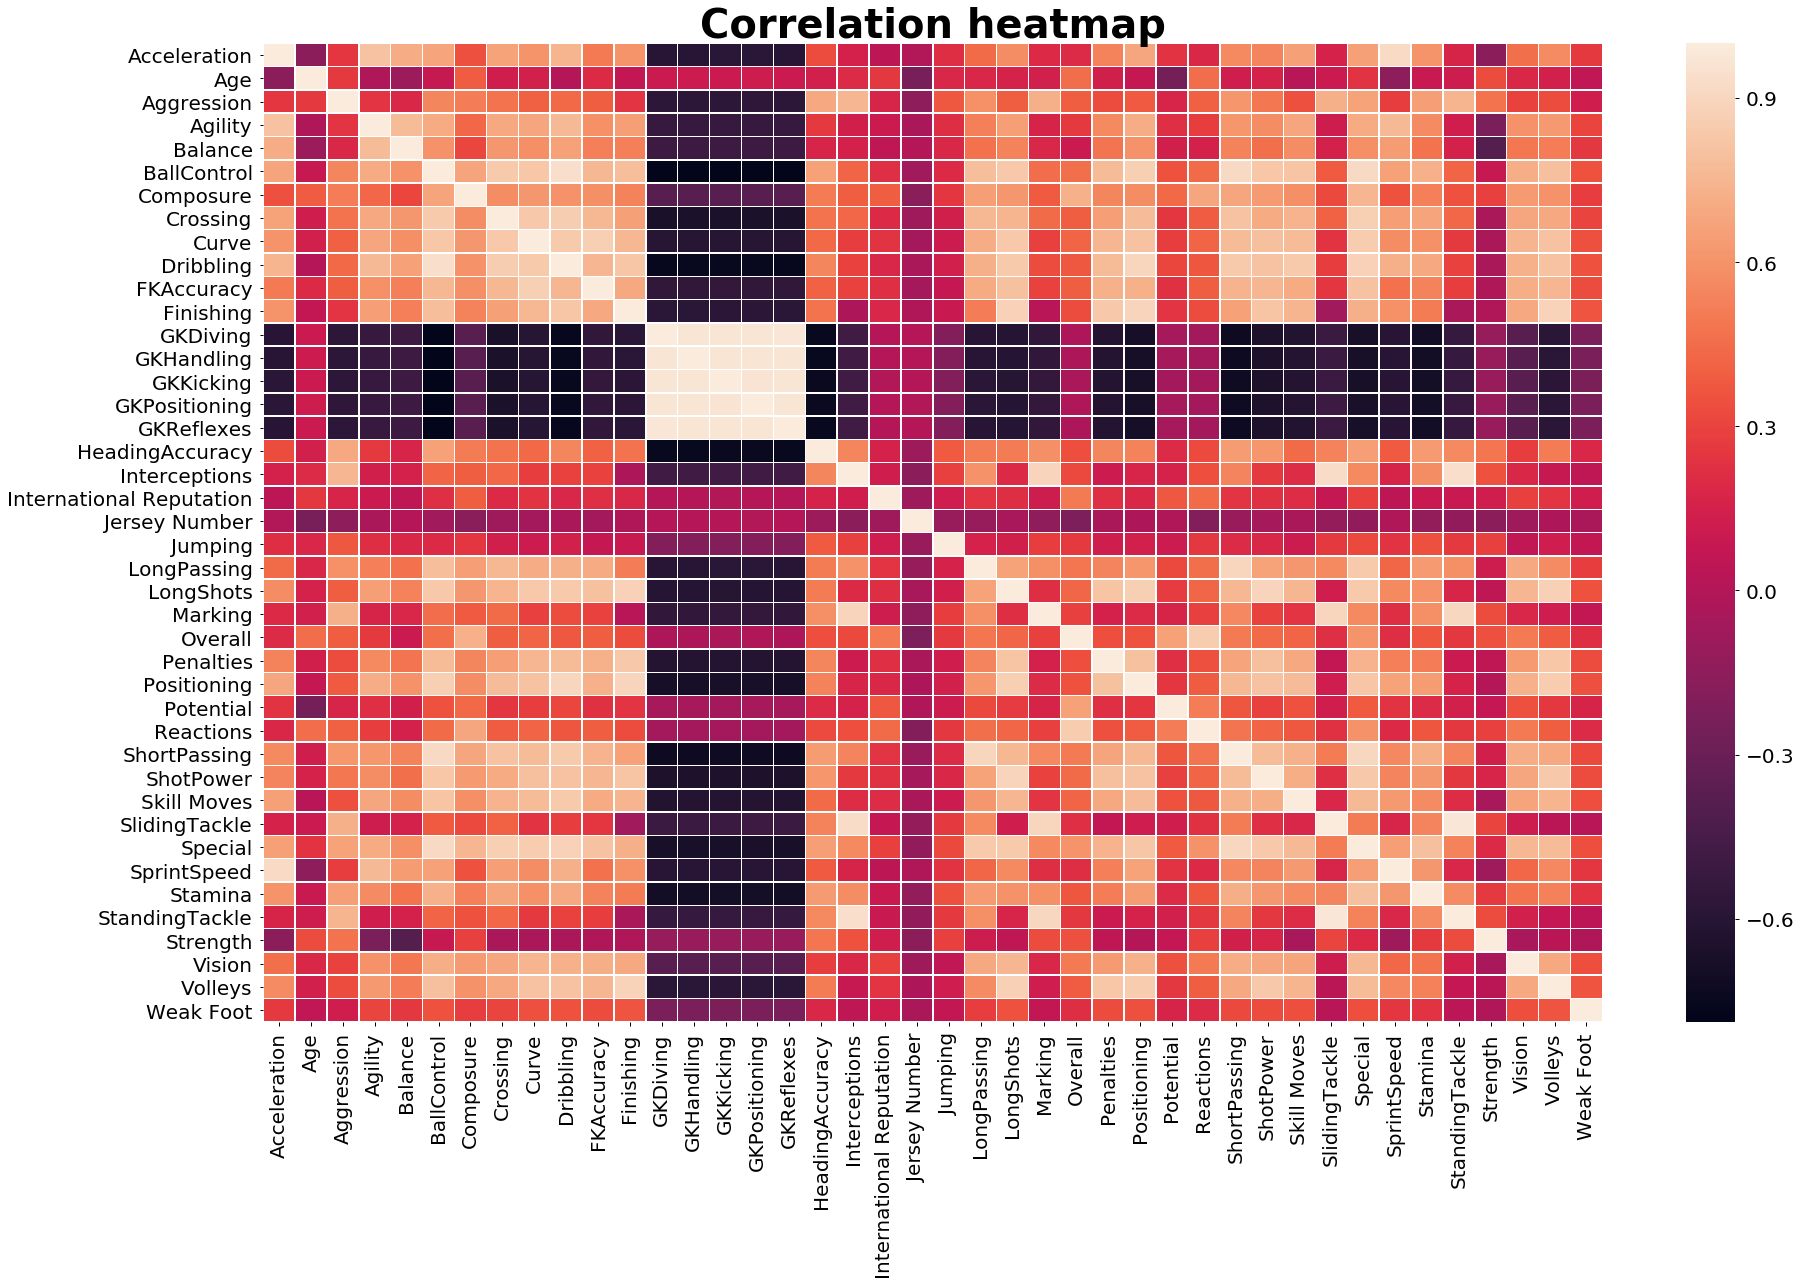

In [11]:
# correlation heatmap for selected player features

plt.rcParams['figure.figsize']=(30,18)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
hm = sns.heatmap(df[['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance',
       'BallControl', 'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Club',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Height', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Jumping', 'LAM', 'LB',
       'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'LongPassing',
       'LongShots', 'Marking', 'Name', 'Nationality', 'Overall', 'Penalties',
       'Position', 'Positioning', 'Potential', 'Preferred Foot', 'RAM', 'RB',
       'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'Reactions', 'ST',
       'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle', 'Special',
       'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Value',
       'Vision', 'Volleys', 'Wage', 'Weak Foot', 'Weight', 'Work Rate']].corr(), linewidths=.5)
hm.set_title(label='Correlation heatmap', fontsize=40, weight='bold')
hm;

From the correlation heatmap we can easily identify the goalkeepers, and conclude that their goalkeeper specific attributes are highly correlated, but largely unrelated to other attributes. This notion is something to consider for later analysis, as goalkeepers may be excluded from the analysis.

[Text(0,0.5,''), Text(0.5,0,'')]

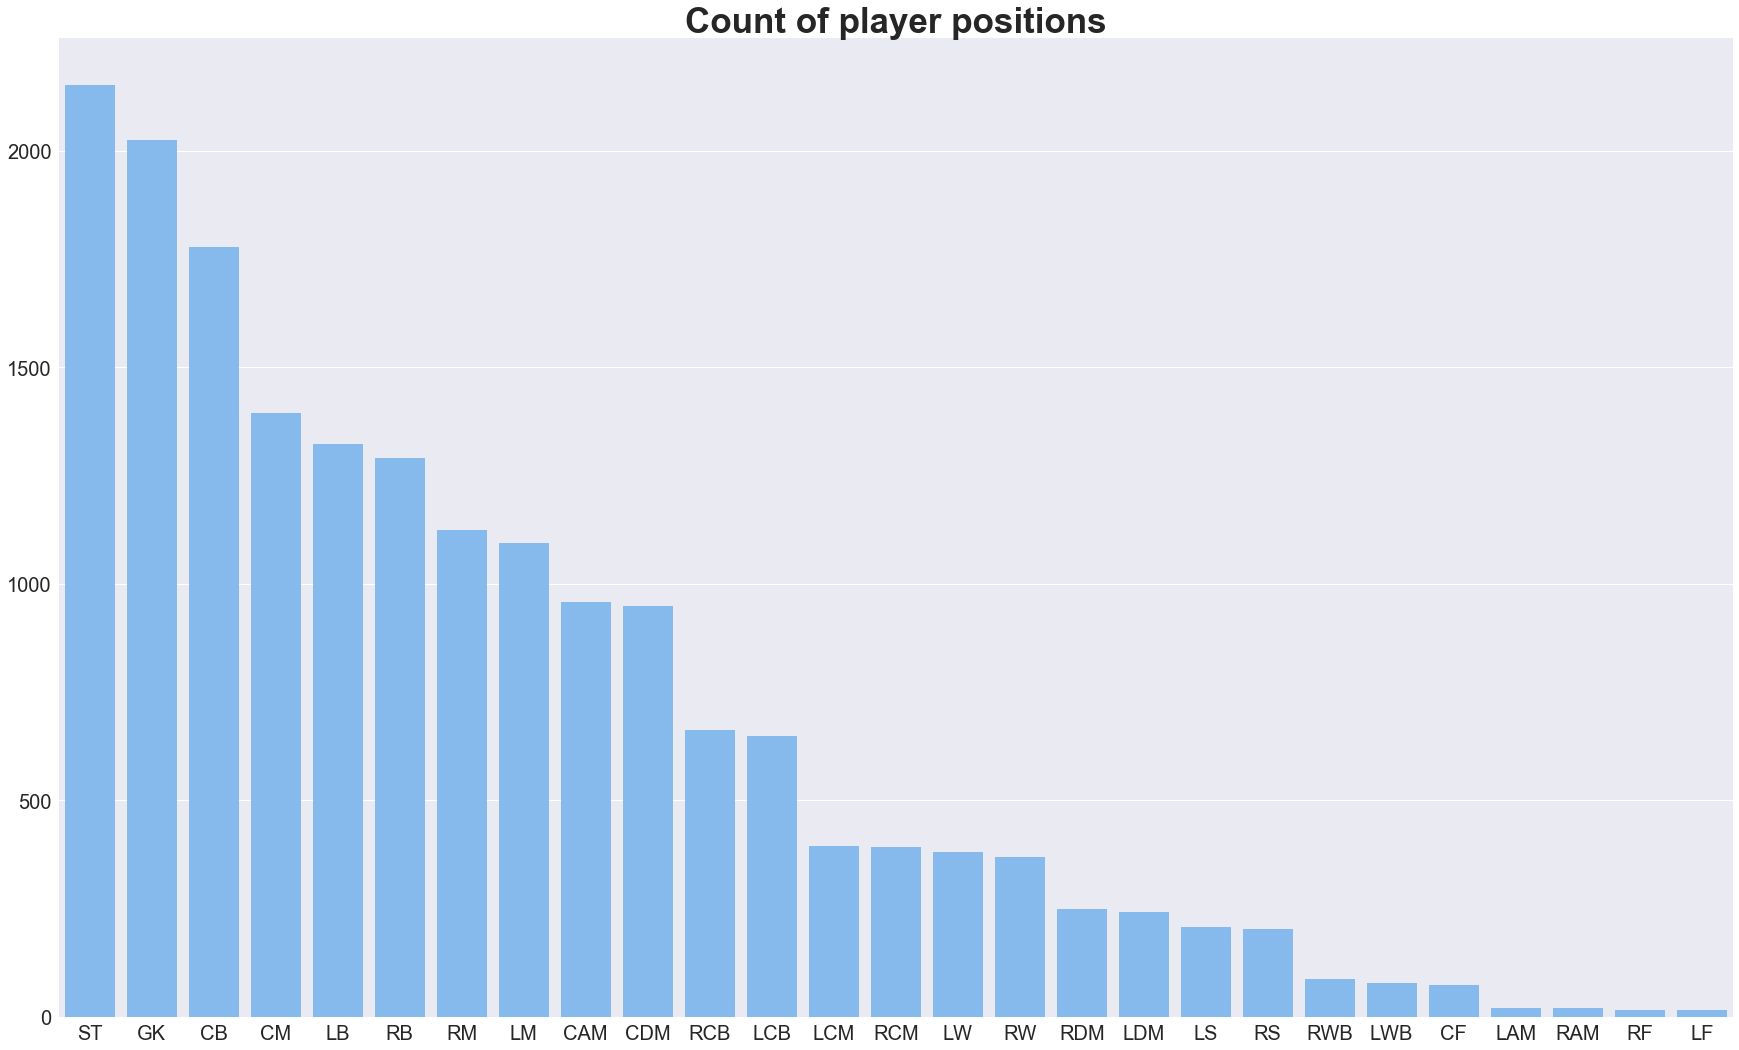

In [12]:
# counting players by position
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(30,18)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":2.5})
pos_count = sns.countplot(x = 'Position', data = df, color = 'xkcd:sky blue', order=df['Position'].value_counts().index);
pos_count.set_title(label = 'Count of player positions', fontsize=35, weight = 'bold');
pos_count.set(xlabel='', ylabel='')

As we can see, the players are defined by very specific positions and in categories that are too specific. I will create 4 broader categories that will be easier to analyse  - goalkeepers, defenders, midfielders and forwards.

In [13]:
# defining broader categories
goalkeepers = ['GK']
defenders = ['CB', 'RB', 'LB', 'RCB', 'LCB', 'RWB', 'LWB'] 
midfielders = ['CM', 'LCM', 'RCM', 'RM', 'LM', 'CDM', 'LDM', 'RDM', 'CAM', 'LAM', 'RAM', 'LCM', 'RCM']
forwards = ['ST', 'LF', 'RF', 'CF', 'RS', 'LS', 'LW', 'RW']

In [14]:
def player_position(data):
    if data['Position'] in goalkeepers:
        return 'Goalkeeper'
    if data['Position'] in defenders:
        return 'Defender'    
    if data['Position'] in midfielders:
        return 'Midfielder'
    if data['Position'] in forwards:
        return 'Forward'
    
df['General_position'] = df.apply(lambda df: player_position (df), axis=1)

[Text(0,0.5,''), Text(0.5,0,'')]

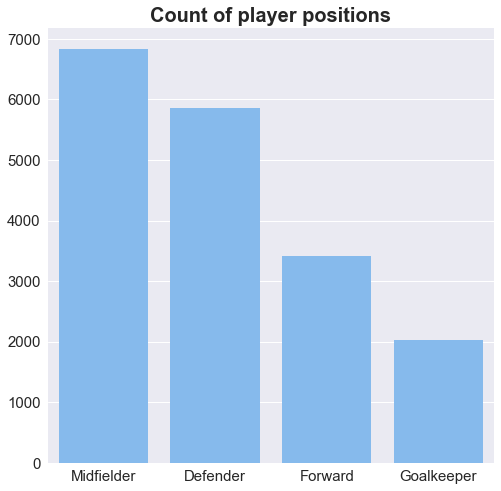

In [15]:
# counting players by broader position
plt.rcParams['figure.figsize']=(8,8)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
gen_pos_count = sns.countplot(x = 'General_position', data = df, color = 'xkcd:sky blue', order=df['General_position'].value_counts().index);
gen_pos_count.set_title(label = 'Count of player positions', fontsize=20, weight = 'bold');
gen_pos_count.set(xlabel='', ylabel='')

[Text(0,0.5,''), Text(0.5,0,'')]

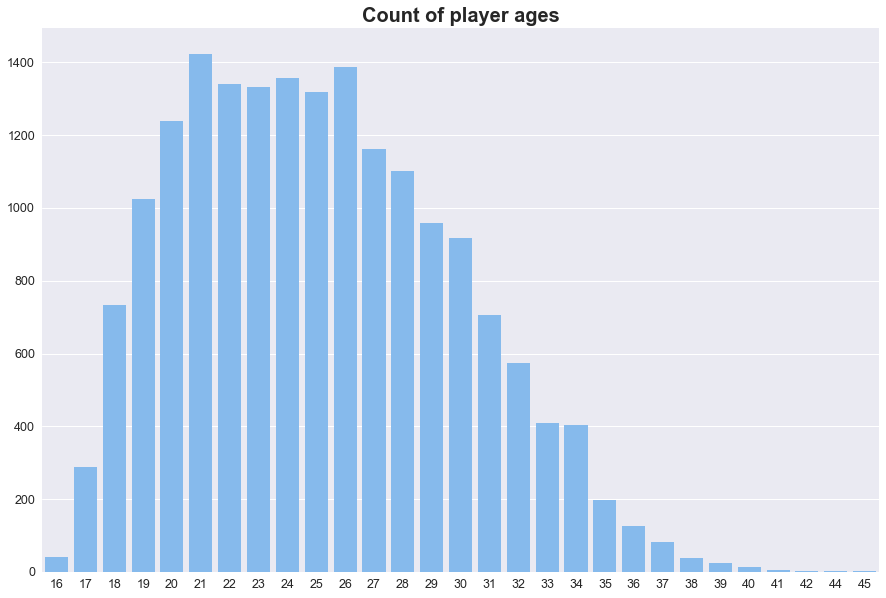

In [16]:
# Histogram of players ages
plt.rcParams['figure.figsize']=(15,10)
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth":2.5})
age_cplot = sns.countplot(x = 'Age', data = df, color = 'xkcd:sky blue');
age_cplot.set_title(label = 'Count of player ages', fontsize=20, weight = 'bold');
age_cplot.set(xlabel='', ylabel='')

Most common age for footballers is between 20 and 26. This is expected and supports the notion that footballers have short careers.

Let's now query the data to investigate some interesting features..

In [17]:
# top rated goalkeepers
df[df['General_position'] == 'Goalkeeper'][['Name', 'Value', 'Overall',]].head()

,Name,Value,Overall
3,De Gea,€72M,91
9,J. Oblak,€68M,90
18,M. ter Stegen,€58M,89
19,T. Courtois,€53.5M,89
22,M. Neuer,€38M,89


In [18]:
# top rated defenders
df[df['General_position'] == 'Defender'][['Name', 'Value', 'Overall']].head()

,Name,Value,Overall
8,Sergio Ramos,€51M,91
12,D. Godín,€44M,90
24,G. Chiellini,€27M,89
34,M. Hummels,€46M,88
35,Marcelo,€43M,88


In [19]:
# top rated midfielders
df[df['General_position'] == 'Midfielder'][['Name', 'Value', 'Overall']].head()

,Name,Value,Overall
4,K. De Bruyne,€102M,91
6,L. Modrić,€67M,91
11,T. Kroos,€76.5M,90
13,David Silva,€60M,90
14,N. Kanté,€63M,89


In [20]:
# top rated forwards
df[df['General_position'] == 'Forward'][['Name', 'Value', 'Overall']].head()

,Name,Value,Overall
0,L. Messi,€110.5M,94
1,Cristiano Ronaldo,€77M,94
2,Neymar Jr,€118.5M,92
5,E. Hazard,€93M,91
7,L. Suárez,€80M,91


In [21]:
# club with the highest average age
df.groupby(['Club'])['Age'].mean().sort_values(ascending = False).head(5)

Club
Paraná                 31.6
Cruzeiro               30.6
Atlético Paranaense    30.4
Chapecoense            30.4
Botafogo               30.4
Name: Age, dtype: float64

In [22]:
# club with the youngest average age
df.groupby(['Club'])['Age'].mean().sort_values(ascending = True).head(5)

Club
FC Nordsjælland             20.259259
FC Groningen                21.423077
Bohemian FC                 21.480000
FC Sochaux-Montbéliard      21.678571
FC Admira Wacker Mödling    21.925926
Name: Age, dtype: float64

These ages are suprisingly young and raise questions as to whether they are anomalous. A google search of the youngest team, FC Nordsjælland, however, confirms that they are indeed an exceptionally young squad that focuses on developing young talent - well done Denmark.

In [23]:
# top 5 heaviest players
df.sort_values('Weight', ascending = False)[['Name', 'Weight']].head(5)

,Name,Weight
9501,A. Akinfenwa,243lbs
13520,L. Watkowiak,236lbs
8652,C. Seitz,236lbs
15179,M. Rhead,234lbs
8908,F. Farnolle,229lbs


In [24]:
# top 5 oldest players
df.nlargest(5, "Age")

,Name,Value,Overall,Acceleration,Age,Aggression,Agility,Balance,BallControl,Body Type,...,Stamina,StandingTackle,Strength,Vision,Volleys,Wage,Weak Foot,Weight,Work Rate,General_position
4741,O. Pérez,€160K,71,60.0,45,26.0,69.0,69.0,23.0,Stocky,...,41.0,12.0,66.0,40.0,13.0,€8K,3.0,165lbs,Medium/ Medium,Goalkeeper
17726,T. Warner,€0,53,23.0,44,31.0,27.0,38.0,27.0,Normal,...,25.0,15.0,58.0,21.0,15.0,€1K,2.0,185lbs,Medium/ Medium,Goalkeeper
18183,K. Pilkington,€0,48,15.0,44,24.0,31.0,31.0,16.0,Normal,...,22.0,15.0,44.0,11.0,11.0,€1K,2.0,190lbs,Medium/ Medium,Goalkeeper
10545,S. Narazaki,€40K,65,52.0,42,30.0,55.0,62.0,30.0,Normal,...,40.0,24.0,65.0,64.0,19.0,€1K,3.0,176lbs,Medium/ Medium,Goalkeeper
1120,J. Villar,€0,77,31.0,41,22.0,50.0,68.0,24.0,Normal,...,22.0,13.0,62.0,51.0,8.0,€0,3.0,187lbs,Medium/ Medium,Goalkeeper


In [25]:
# top 5 tallest players
df.sort_values('Height', ascending = False)[['Name', 'Height']].head(5)

,Name,Height
11614,T. Holý,6'9
17927,D. Hodzic,6'9
11903,K. Scherpen,6'8
17694,M. Casey,6'8
4189,V. Milinković-Savić,6'8


In [26]:
# players with the most potential
df.sort_values('Potential', ascending = False)[['Name', 'Overall', 'Potential']].head(5)

,Name,Overall,Potential
25,K. Mbappé,88,95
0,L. Messi,94,94
15,P. Dybala,89,94
1,Cristiano Ronaldo,94,94
2,Neymar Jr,92,93


The players listed here are already exceptionally good and rated highly, with some having the potential to improve only marginally, if at all. Who then, are the players that have the potential to improve the most..

In [27]:
df['Potential_markup'] = df['Potential'] - df['Overall']

In [28]:
df.sort_values('Potential_markup', ascending = False)[['Name', 'Overall', 'Potential', 'Potential_markup', 'Age']].head(5)

,Name,Overall,Potential,Potential_markup,Age
18072,D. Campbell,50,76,26,17
16028,J. von Moos,58,84,26,17
17175,B. Mumba,55,80,25,16
16629,Y. Lenze,57,82,25,17
17784,K. Askildsen,52,77,25,17


As expected, the players with the greatest potential are young players that currently have a relatively low overall ranking. These players might be worth investing in..

In [29]:
# features pertaining specifically to players' ability
player_features = ('Crossing', 'Finishing','HeadingAccuracy', 'ShortPassing',
                   'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                   'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
                   'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
                   'Strength', 'LongShots', 'Aggression', 'Interceptions',
                   'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                   'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                   'GKKicking', 'GKPositioning', 'GKReflexes')

In [30]:
# mean values for each general position
df.groupby(df['General_position'])[player_features].mean()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
General_position,,,,,,,,,,,,,,,,,,,,,
Defender,51.198602,35.072451,61.052847,59.198602,35.648483,52.376747,43.407092,38.878111,53.500511,57.661439,...,43.470167,58.414081,63.927890,66.727583,65.031879,10.545857,10.561712,10.524378,10.545687,10.524719
Forward,50.762142,65.863663,60.099473,59.772089,57.715038,65.062025,53.641603,46.478935,47.983031,65.406085,...,61.924517,60.822996,31.103277,27.610006,25.172030,10.438853,10.527209,10.575190,10.449971,10.456992
Goalkeeper,14.257284,12.016296,14.368889,27.269136,12.397037,13.856296,14.707654,14.464198,25.808395,19.949630,...,20.007407,45.122469,15.225185,14.141235,14.072099,65.323951,62.868148,61.477531,63.047407,66.101728
Midfielder,58.481427,54.315589,52.127669,67.032173,50.780930,65.400702,56.793214,52.892074,62.391489,66.851419,...,54.665399,61.775227,50.593302,51.362240,48.653992,10.489032,10.566540,10.559667,10.554694,10.520181


In [31]:
# make dataset having mean attributes of players in each position
ftrs = df.groupby(df['General_position'])[player_features].mean().T
ftrs.nlargest(5, "Defender").index

Index(['Strength', 'Jumping', 'Stamina', 'StandingTackle', 'Aggression'], dtype='object')

In [32]:
ftrs.head(10)

General_position,Defender,Forward,Goalkeeper,Midfielder
Crossing,51.198602,50.762142,14.257284,58.481427
Finishing,35.072451,65.863663,12.016296,54.315589
HeadingAccuracy,61.052847,60.099473,14.368889,52.127669
ShortPassing,59.198602,59.772089,27.269136,67.032173
Volleys,35.648483,57.715038,12.397037,50.780930
Dribbling,52.376747,65.062025,13.856296,65.400702
Curve,43.407092,53.641603,14.707654,56.793214
FKAccuracy,38.878111,46.478935,14.464198,52.892074
LongPassing,53.500511,47.983031,25.808395,62.391489
BallControl,57.661439,65.406085,19.949630,66.851419


In [33]:
# print the top 5 features per position
for i in ftrs:
    print(ftrs.nlargest(5, i).index)

Index(['Strength', 'Jumping', 'Stamina', 'StandingTackle', 'Aggression'], dtype='object')
Index(['SprintSpeed', 'Acceleration', 'Agility', 'Balance', 'ShotPower'], dtype='object')
Index(['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking'], dtype='object')
Index(['Balance', 'Agility', 'Acceleration', 'SprintSpeed', 'Stamina'], dtype='object')


In [91]:
# get values and index of top 5 attributes for each position
listy = ['Defender', 'Midfielder', 'Goalkeeper', 'Forward']

ft_def = ftrs['Defender'].nlargest(5)
ft_mid = ftrs['Midfielder'].nlargest(5)
ft_gol = ftrs['Goalkeeper'].nlargest(5)
ft_for = ftrs['Forward'].nlargest(5)
ft =[ft_def, ft_mid, ft_gol, ft_for]

var_def = list(ft_def.index)
var_mid = list(ft_mid.index)
var_gol = list(ft_gol.index)
var_for = list(ft_for.index)
var =[var_def, var_mid, var_gol, var_for]

val_def = list(ft_def)
val_mid = list(ft_mid)
val_gol = list(ft_gol)
val_for = list(ft_for)
val =[val_def, val_mid, val_gol, val_for]

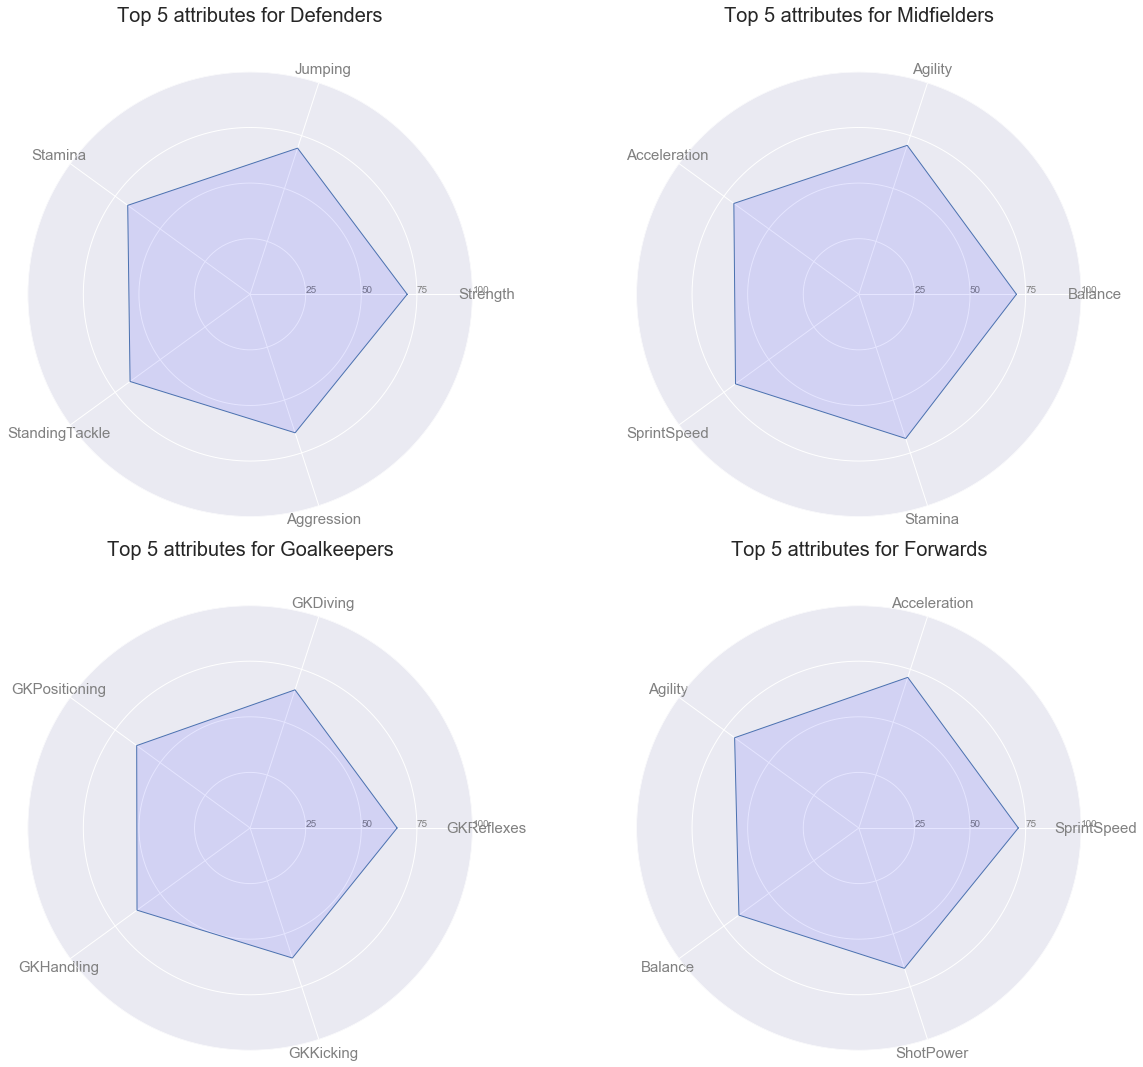

In [92]:
# radar plot of top 5 attributes in each player position

count = 1
plt.rcParams['figure.figsize']=(20,18)
for i in range(4):
    categories = var[i]
    N = len(categories)

    # repeat first variable to get a complete graph (closed circle)
    val_def = val[i]
    val_def += val_def[:1]
    val_def

    # determine angle of each axis
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # plot configuration
    ax = plt.subplot(2, 2, count, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=15)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25", "50","75", "100"], color="grey", size=10)
    plt.ylim(0,100)
    plt.title('Top 5 attributes for {}s'.format(listy[i]), size=20, y=1.1)

    # plot data
    ax.plot(angles, val_def, linewidth=1, linestyle='solid')

    # fill area
    ax.fill(angles, val_def, 'b', alpha=0.1)
    count += 1

In [46]:
# counting players from each country
nat = df.groupby('Nationality').count()['Name'].sort_values(ascending = False)
print(nat.index, nat.head())

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands',
       ...
       'Belize', 'São Tomé & Príncipe', 'Grenada', 'Lebanon', 'Botswana',
       'Puerto Rico', 'St Lucia', 'Qatar', 'South Sudan', 'Mauritius'],
      dtype='object', name='Nationality', length=164) Nationality
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Name, dtype: int64


In [47]:
# interactive histogram of the count of players from each country
plt_data = [go.Bar(
    x = nat.index,
    y = nat
    )]
layout = go.Layout(
    autosize=False,
    width=3000,
    height=800,
    title = "Total players from a Nation in the whole game"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [48]:
# getting dataframe of countries with more than 50 players
nat50 = nat[nat >= 50]
nat50 = pd.DataFrame(nat50).reset_index()
nat50.columns = ['Country', 'Counts']
#nat50 = nat50.reset_index().drop('index', axis=1)
nat50.set_index("Country", inplace=True)
nat50.head()

,Counts
Country,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914


In [49]:
nat50.loc['England'].Counts

1662

In [50]:
# combining UK counts
UK = nat50.loc['England'].Counts + nat50.loc['Wales'].Counts + nat50.loc['Scotland'].Counts + nat50.loc['Northern Ireland'].Counts
UK

2157

In [51]:
nat50.loc['United Kingdom'] = UK
nat50.loc['United Kingdom'].Counts

2157

In [52]:
nat50.index

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands', 'Sweden', 'China PR', 'Chile',
       'Republic of Ireland', 'Mexico', 'United States', 'Poland', 'Norway',
       'Saudi Arabia', 'Denmark', 'Korea Republic', 'Portugal', 'Turkey',
       'Austria', 'Scotland', 'Belgium', 'Australia', 'Switzerland', 'Uruguay',
       'Senegal', 'Wales', 'Croatia', 'Serbia', 'Nigeria', 'Ghana', 'Greece',
       'Ivory Coast', 'Czech Republic', 'Cameroon', 'Morocco', 'Paraguay',
       'Northern Ireland', 'Russia', 'Ukraine', 'South Africa', 'Finland',
       'Venezuela', 'Canada', 'Bosnia Herzegovina', 'Algeria', 'Slovenia',
       'Slovakia', 'Romania', 'DR Congo', 'United Kingdom'],
      dtype='object', name='Country')

In [53]:
# interactive choropleth map of counts of players per country
data = [ dict(
        type = 'choropleth',
        locations = nat50.index,
        locationmode = 'country names',
        z = nat50['Counts'],
        text = nat50.index,
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of players'),
      ) ]

layout = dict(
    title = 'Number of players per country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')

In [54]:
# radar plot of the top 5 forwards and their attributes
top_fwds = df[df['General_position'] == 'Forward'].sort_values(by = 'Overall', ascending = False).head(5)
plt_cols = ['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [15, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 5 Forwards",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [55]:
# radar plot of the top 5 defenders and their attributes

top_def = df[df['General_position'] == 'Defender'].sort_values(by = 'Overall', ascending = False).head(5)

top_def.reset_index(inplace=True)
plt_data = [] 
for i in range(top_def.shape[0]):
    trace = go.Scatterpolar(
        r = top_def.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_def.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [15, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 5 Defenders",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [56]:
# radar plot of the top 5 midfielders and their attributes

top_mid = df[df['General_position'] == 'Midfielder'].sort_values(by = 'Overall', ascending = False).head(5)

top_mid.reset_index(inplace=True)
plt_data = [] 
for i in range(top_mid.shape[0]):
    trace = go.Scatterpolar(
        r = top_mid.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_mid.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [15, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 5 Midfielders",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [57]:
# radar plot of the top 5 goalkeepers and their goalkeeper specific attributes

top_gks = df[df['General_position'] == 'Goalkeeper'].sort_values(by = 'Overall', ascending = False).head(5)
plt_cols = [ 'Reactions','Jumping','Strength','GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']
top_gks.reset_index(inplace=True)
plt_data = [] 
for i in range(top_gks.shape[0]):
    trace = go.Scatterpolar(
        r = top_gks.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_gks.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [40, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 goalkeepers",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

## Clustering analysis

In this section I will perfrom k-means clustering on the data, aggregated to the general position level.

In [58]:
ftrsT = ftrs.T
ftrsT.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
General_position,,,,,,,,,,,,,,,,,,,,,
Defender,51.198602,35.072451,61.052847,59.198602,35.648483,52.376747,43.407092,38.878111,53.500511,57.661439,...,43.470167,58.414081,63.927890,66.727583,65.031879,10.545857,10.561712,10.524378,10.545687,10.524719
Forward,50.762142,65.863663,60.099473,59.772089,57.715038,65.062025,53.641603,46.478935,47.983031,65.406085,...,61.924517,60.822996,31.103277,27.610006,25.172030,10.438853,10.527209,10.575190,10.449971,10.456992
Goalkeeper,14.257284,12.016296,14.368889,27.269136,12.397037,13.856296,14.707654,14.464198,25.808395,19.949630,...,20.007407,45.122469,15.225185,14.141235,14.072099,65.323951,62.868148,61.477531,63.047407,66.101728
Midfielder,58.481427,54.315589,52.127669,67.032173,50.780930,65.400702,56.793214,52.892074,62.391489,66.851419,...,54.665399,61.775227,50.593302,51.362240,48.653992,10.489032,10.566540,10.559667,10.554694,10.520181


In [59]:
ft = df[df.columns.intersection(player_features)]
ft.index = df['Name']
ft.head()

,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,...,Reactions,ShortPassing,ShotPower,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,91.0,48.0,91.0,95.0,96.0,96.0,84.0,93.0,97.0,94.0,...,95.0,90.0,85.0,26.0,86.0,72.0,28.0,59.0,94.0,86.0
Cristiano Ronaldo,89.0,63.0,87.0,70.0,94.0,95.0,84.0,81.0,88.0,76.0,...,96.0,81.0,95.0,23.0,91.0,88.0,31.0,79.0,82.0,87.0
Neymar Jr,94.0,56.0,96.0,84.0,95.0,94.0,79.0,88.0,96.0,87.0,...,94.0,84.0,80.0,33.0,90.0,81.0,24.0,49.0,87.0,84.0
De Gea,57.0,38.0,60.0,43.0,42.0,68.0,17.0,21.0,18.0,19.0,...,90.0,50.0,31.0,13.0,58.0,43.0,21.0,64.0,68.0,13.0
K. De Bruyne,78.0,76.0,79.0,77.0,91.0,88.0,93.0,85.0,86.0,83.0,...,91.0,92.0,91.0,51.0,76.0,90.0,58.0,75.0,94.0,82.0


In [60]:
len(ft[ft.isnull().any(axis=1)])

48

In [61]:
ft = ft.dropna(how='all')
len(ft[ft.isnull().any(axis=1)])

0

In [62]:
# scale the data before performing analysis, not exactly necessary as variables are measured on the same scale
ftrs_sca = pd.DataFrame(preprocessing.scale(ft), index=ft.index, columns=ft.columns)
#ftrs_sca = ftrs_sca.T
ftrs_sca.head()

,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,...,Reactions,ShortPassing,ShotPower,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,1.767621,-0.453087,1.862187,2.195382,2.255198,3.266205,1.865922,2.491426,2.201445,2.925736,...,3.680643,2.130287,1.713704,-0.923569,1.452129,0.552403,-0.909268,-0.502679,2.869906,2.435355
Cristiano Ronaldo,1.633639,0.410595,1.591288,0.426820,2.135338,3.178760,1.865922,1.839066,1.725503,1.895887,...,3.791628,1.518005,2.293836,-1.064489,1.793436,1.559053,-0.770785,1.090102,2.021639,2.491871
Neymar Jr,1.968594,0.007543,2.200811,1.417214,2.195268,3.091316,1.593650,2.219609,2.148563,2.525239,...,3.569658,1.722099,1.423639,-0.594753,1.725175,1.118643,-1.093911,-1.299069,2.375083,2.322322
De Gea,-0.510075,-1.028876,-0.237281,-1.483228,-0.981022,0.817758,-1.782517,-1.422733,-1.976272,-1.365303,...,3.125717,-0.590969,-1.419003,-1.534226,-0.459193,-1.272151,-1.232393,-0.104484,1.031994,-1.690356
K. De Bruyne,0.896737,1.159120,1.049490,0.922017,1.955548,2.566649,2.356010,2.056519,1.619738,2.296384,...,3.236703,2.266350,2.061783,0.250772,0.769514,1.684884,0.475556,0.771546,2.869906,2.209288


In [63]:
#x = ftrs_sca.iloc[:, [0, 1, 2, 3]].values
x = ftrs_sca.iloc[:,:].values
x

array([[ 1.76762059, -0.45308741,  1.86218735, ..., -0.502679  ,
         2.86990578,  2.4353548 ],
       [ 1.63363851,  0.4105953 ,  1.5912882 , ...,  1.09010195,
         2.0216389 ,  2.49187138],
       [ 1.96859372,  0.00754337,  2.20081128, ..., -1.29906948,
         2.37508343,  2.32232162],
       ...,
       [ 0.36080869, -1.37434896, -0.9145289 , ..., -2.6529333 ,
        -0.73522847, -0.27744139],
       [-0.2421107 , -1.31677011, -0.77907933, ..., -1.37870853,
        -0.45247285, -0.16440821],
       [-0.51007487,  0.00754337, -0.57590497, ..., -0.42303996,
        -0.31109503, -0.72957408]])

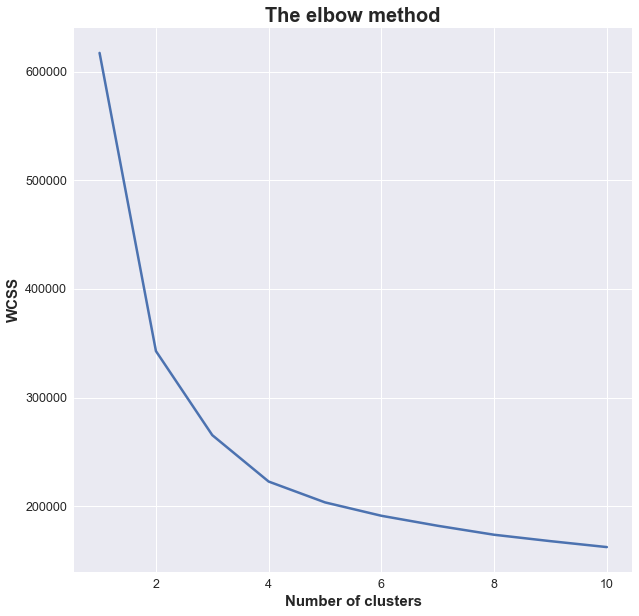

In [64]:
# elbow method - plotting the within-cluster sum of sqaures againt cluster size

# appending values to wcss list
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# plot
plt.rcParams['figure.figsize']=(10, 10)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method', fontsize=20, weight = 'bold')
plt.xlabel('Number of clusters', fontsize=15, weight = 'bold')
plt.ylabel('WCSS', fontsize=15, weight = 'bold') #within cluster sum of squares
plt.show()

In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km = kmeans.fit(x)
km.labels_[0:10]

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

In [66]:
# visualize cluster label against player
ftrs_sca['Label'] = km.labels_
ftrs_sca['Label']

Name
L. Messi                0
Cristiano Ronaldo       0
Neymar Jr               0
De Gea                  2
K. De Bruyne            0
E. Hazard               0
L. Modrić               0
L. Suárez               0
Sergio Ramos            0
J. Oblak                2
R. Lewandowski          0
T. Kroos                0
D. Godín                0
David Silva             0
N. Kanté                0
P. Dybala               0
H. Kane                 0
A. Griezmann            0
M. ter Stegen           2
T. Courtois             2
Sergio Busquets         0
E. Cavani               0
M. Neuer                2
S. Agüero               0
G. Chiellini            0
K. Mbappé               0
M. Salah                0
Casemiro                0
J. Rodríguez            0
L. Insigne              0
                       ..
R. Roache               3
L. Wahlstedt            2
J. Williams             1
M. Hurst                2
C. Maher                1
Y. Góez                 1
K. Pilkington           2
D. Hort

[Text(0,0.5,''), Text(0.5,0,'')]

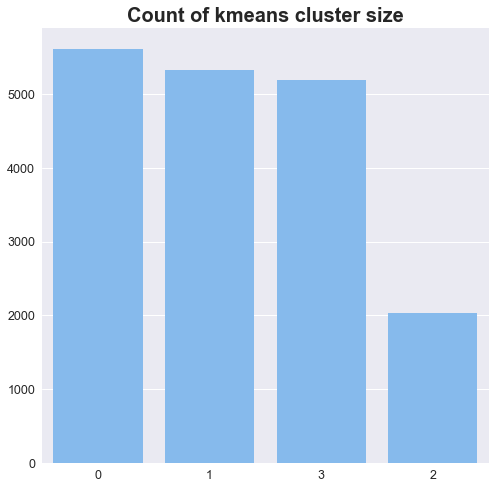

In [67]:
# histogram of cluster sizes
plt.rcParams['figure.figsize']=(8,8)
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth":2.5})
kmeans_count = sns.countplot(x = 'Label', data = ftrs_sca, color = 'xkcd:sky blue', order= ftrs_sca['Label'].value_counts().index);
kmeans_count.set_title(label = 'Count of kmeans cluster size', fontsize=20, weight = 'bold');
kmeans_count.set(xlabel='', ylabel='')

Goalkeepers have been clustered and classified well, this is shown through the labels displayed above and the size of cluster 2 in which they belong. However, there is significant overlap in outfield players. This might be expected, for instance, if we refer back to the radar plots showing the top attributes of each position, features such as acceleration are present in both midfielders and forwards.

In [68]:
y_kmeans = kmeans.fit_predict(x)

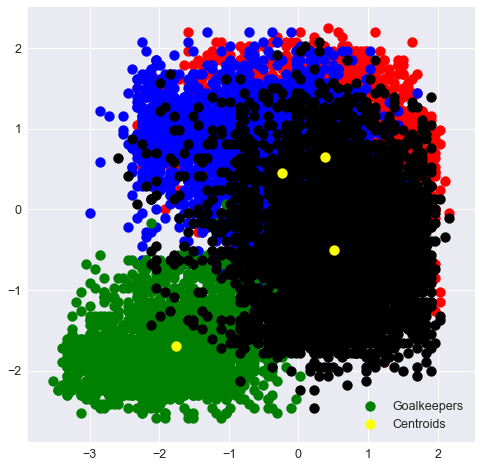

In [69]:
# visualizing clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = '')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = '')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Goalkeepers')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'black', label = '')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

## Linear regression analysis

In [70]:
ftrs.head()

General_position,Defender,Forward,Goalkeeper,Midfielder
Crossing,51.198602,50.762142,14.257284,58.481427
Finishing,35.072451,65.863663,12.016296,54.315589
HeadingAccuracy,61.052847,60.099473,14.368889,52.127669
ShortPassing,59.198602,59.772089,27.269136,67.032173
Volleys,35.648483,57.715038,12.397037,50.780930


In [71]:
ftrs['Mean'] = ftrs.mean(axis=1)
ftrs.head()
ftrs.nlargest(10, 'Mean').index

Index(['Strength', 'Jumping', 'Reactions', 'SprintSpeed', 'Acceleration',
       'Balance', 'Agility', 'Stamina', 'Composure', 'ShortPassing'],
      dtype='object')

Printed above are the player features that have the highest means, does this make these variables good candidates for being predictors? And what about goalkeepers, we have seen that their attributes are negatively correlated with variables most related to outfield players.

**First linear regression model...**

In [72]:
# printing model summary
m1 = sm.ols('Overall ~ Strength + Jumping + Reactions + SprintSpeed + Acceleration', df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:11:21   Log-Likelihood:                -48670.
No. Observations:               18159   AIC:                         9.735e+04
Df Residuals:                   18153   BIC:                         9.740e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.3679      0.235     90.747      0.000      20.906      21.829
Strength         0.0697      0.002     29.478      0.000       0.065       0.074
Jumping          0.0061      0.002      2.512      0.012       0.001       0.011
Reactions        0.6126      0.003    193.856      0.000       0.606       0.619
SprintSpeed      0.0162      0.005      3.457      0.001       0.007       0.025
Acceleration     0.0154      0.005      3.288      0.001       0.006       0.025
==============================================================================
Omnibus:                       87.016   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.592
Skew:                          -0.059   Prob(JB):                     4.81e-26
Kurtosis:                       3.374   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The **R-squared** value of **0.739** indicates that the model has a decent goodness of fit and accounts for a significant amount of the variation within the data. We observe that all values, except jumping, are significant at the **0.05** level. Overall, the chosen predictors explain a players Overall value quite well. I will now add more explanatory variables to see if adding more features can account for more the variance..

**Second linear regression model...**

Now the model includes the top 10 player features with the highest means.

In [73]:
# model 2
m2 = sm.ols('Overall ~ Strength + Jumping + Reactions + SprintSpeed + Acceleration'
            '+ Balance + Agility + Stamina + Composure + ShortPassing', df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     6340.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:11:24   Log-Likelihood:                -47236.
No. Observations:               18159   AIC:                         9.449e+04
Df Residuals:                   18148   BIC:                         9.458e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.2388      0.257     94.403      0.000      23.736      24.742
Strength         0.0371      0.003     13.251      0.000       0.032       0.043
Jumping          0.0204      0.002      8.742      0.000       0.016       0.025
Reactions        0.4900      0.004    129.886      0.000       0.483       0.497
SprintSpeed      0.0135      0.004      3.060      0.002       0.005       0.022
Acceleration     0.0157      0.005      3.298      0.001       0.006       0.025
Balance         -0.0567      0.003    -18.071      0.000      -0.063      -0.051
Agility          0.0146      0.003      4.330      0.000       0.008       0.021
Stamina         -0.0380      0.003    -14.598      0.000      -0.043      -0.033
Composure        0.1577      0.004     44.159      0.000       0.151       0.165
ShortPassing     0.0329      0.003     10.957      0.000       0.027       0.039
==============================================================================
Omnibus:                      103.195   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.372
Skew:                          -0.012   Prob(JB):                     1.35e-33
Kurtosis:                       3.447   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding an extra 5 features to the model has only improved the **r-squared** value by **038**. Given that adding these features provides little increase in the models performance, in our next model we will drop these features and include features pertaining to Goalkeeper attributes.

**Third linear regression model...**

In [74]:
# model 3 - inlcuding goalkeeper attributes
m3 = sm.ols('Overall ~ Strength + Jumping + Reactions + SprintSpeed + Acceleration'
            ' + GKReflexes + GKDiving + GKPositioning + GKHandling + GKKicking', df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     5479.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:11:25   Log-Likelihood:                -48249.
No. Observations:               18159   AIC:                         9.652e+04
Df Residuals:                   18148   BIC:                         9.661e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.1060      0.273     62.651      0.000      16.571      17.641
Strength          0.0887      0.002     36.930      0.000       0.084       0.093
Jumping           0.0070      0.002      2.937      0.003       0.002       0.012
Reactions         0.5971      0.003    190.498      0.000       0.591       0.603
SprintSpeed       0.0330      0.005      7.122      0.000       0.024       0.042
Acceleration      0.0446      0.005      9.492      0.000       0.035       0.054
GKReflexes        0.0072      0.008      0.946      0.344      -0.008       0.022
GKDiving          0.0108      0.008      1.413      0.158      -0.004       0.026
GKPositioning     0.0224      0.008      2.956      0.003       0.008       0.037
GKHandling        0.0151      0.008      1.955      0.051   -4.28e-05       0.030
GKKicking         0.0029      0.007      0.407      0.684      -0.011       0.017
==============================================================================
Omnibus:                       74.958   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.505
Skew:                          -0.053   Prob(JB):                     4.07e-22
Kurtosis:                       3.345   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On this occasion, adding Goalkeeper attributes only improved on the **r-squared** of the first model by **0.12**. This result may provide support to the notion that Goalkeepers should be analysed independently of outfield players.

Let's try it..

**Fourth linear regression model...**

In [96]:
# select goalkeepers
gks = df[df['General_position'] == 'Goalkeeper']
gks.shape

(2025, 81)

In [97]:
# linear model for goalkeepers
m4 = sm.ols('Overall ~ GKReflexes + GKDiving + GKPositioning + GKHandling + GKKicking', gks).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 4.311e+04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:28:58   Log-Likelihood:                -2240.5
No. Observations:                2025   AIC:                             4493.
Df Residuals:                    2019   BIC:                             4527.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4696      0.152     -3.098      0.002      -0.767      -0.172
GKReflexes        0.2534      0.005     50.661      0.000       0.244       0.263
GKDiving          0.2344      0.005     44.257      0.000       0.224       0.245
GKPositioning     0.2412      0.004     56.876      0.000       0.233       0.249
GKHandling        0.2305      0.005     49.427      0.000       0.221       0.240
GKKicking         0.0540      0.003     16.519      0.000       0.048       0.060
==============================================================================
Omnibus:                       27.727   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.702
Skew:                          -0.253   Prob(JB):                     3.55e-07
Kurtosis:                       3.308   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As predicted, having a Goalkeeper specific model has increased the performance dramatically. This is because a goalkeepers Overall value is based mostly upon the predictor variables used in the model and so we nearly have a perfect **r-squared**. In reality, this model is essentially meaningless.

We will look next to build a model based only on outfield players.

**Fifth linear regression model...**

In [98]:
outfield = df[df['General_position'] != 'Goalkeeper']
outfield.shape

(16182, 81)

In [99]:
m5 = sm.ols('Overall ~ Strength + Jumping + Reactions + SprintSpeed + Acceleration', outfield).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     9590.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:56:18   Log-Likelihood:                -42683.
No. Observations:               16134   AIC:                         8.538e+04
Df Residuals:                   16128   BIC:                         8.542e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.5725      0.297     55.744      0.000      15.990      17.155
Strength         0.0954      0.003     37.166      0.000       0.090       0.100
Jumping          0.0046      0.002      1.866      0.062      -0.000       0.009
Reactions        0.6074      0.003    184.526      0.000       0.601       0.614
SprintSpeed      0.0322      0.005      6.558      0.000       0.023       0.042
Acceleration     0.0490      0.005      9.701      0.000       0.039       0.059
==============================================================================
Omnibus:                       71.807   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.058
Skew:                          -0.037   Prob(JB):                     5.09e-22
Kurtosis:                       3.375   Cond. No.                     1.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing Goalkeepers from the analysis but keeping predictor variables consistent with the first model only improves the **r-sqaured** value by 0.009. This is negligible and so in this instance it is worthwhile maintaining a complete dataset and not disregarding Goalkeepers.

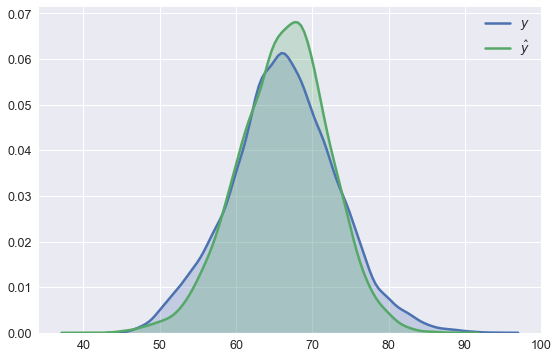

In [76]:
# plot overlaying predicted vs actual values
f, ax = plt.subplots(1, figsize=(9, 6))
sns.kdeplot(df['Overall'], shade=True, ax=ax, label='$y$')
sns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\hat{y}$')
plt.show()

## Linear regression with cross validation

In this section, I will perform another linear regression analysis, this time with cross validation. That is, I will split the data to provide both a training and test data set

In [77]:
df.head()

,Name,Value,Overall,Acceleration,Age,Aggression,Agility,Balance,BallControl,Body Type,...,StandingTackle,Strength,Vision,Volleys,Wage,Weak Foot,Weight,Work Rate,General_position,Potential_markup
0,L. Messi,€110.5M,94,91.0,31,48.0,91.0,95.0,96.0,Messi,...,28.0,59.0,94.0,86.0,€565K,4.0,159lbs,Medium/ Medium,Forward,0
1,Cristiano Ronaldo,€77M,94,89.0,33,63.0,87.0,70.0,94.0,C. Ronaldo,...,31.0,79.0,82.0,87.0,€405K,4.0,183lbs,High/ Low,Forward,0
2,Neymar Jr,€118.5M,92,94.0,26,56.0,96.0,84.0,95.0,Neymar,...,24.0,49.0,87.0,84.0,€290K,5.0,150lbs,High/ Medium,Forward,1
3,De Gea,€72M,91,57.0,27,38.0,60.0,43.0,42.0,Lean,...,21.0,64.0,68.0,13.0,€260K,3.0,168lbs,Medium/ Medium,Goalkeeper,2
4,K. De Bruyne,€102M,91,78.0,27,76.0,79.0,77.0,91.0,Normal,...,58.0,75.0,94.0,82.0,€355K,5.0,154lbs,High/ High,Midfielder,1


In [78]:
player_features_overall = (*player_features, "Overall")
player_features_overall

('Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Overall')

In [79]:
# obtaining dataframe with select features
XY = df[df.columns.intersection(player_features_overall)]
XY.index = df['Name']
XY.head()
XY = XY.dropna()
len(XY[XY.isnull().any(axis=1)])
XY.head()

,Overall,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,...,Reactions,ShortPassing,ShotPower,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,94,91.0,48.0,91.0,95.0,96.0,96.0,84.0,93.0,97.0,...,95.0,90.0,85.0,26.0,86.0,72.0,28.0,59.0,94.0,86.0
Cristiano Ronaldo,94,89.0,63.0,87.0,70.0,94.0,95.0,84.0,81.0,88.0,...,96.0,81.0,95.0,23.0,91.0,88.0,31.0,79.0,82.0,87.0
Neymar Jr,92,94.0,56.0,96.0,84.0,95.0,94.0,79.0,88.0,96.0,...,94.0,84.0,80.0,33.0,90.0,81.0,24.0,49.0,87.0,84.0
De Gea,91,57.0,38.0,60.0,43.0,42.0,68.0,17.0,21.0,18.0,...,90.0,50.0,31.0,13.0,58.0,43.0,21.0,64.0,68.0,13.0
K. De Bruyne,91,78.0,76.0,79.0,77.0,91.0,88.0,93.0,85.0,86.0,...,91.0,92.0,91.0,51.0,76.0,90.0,58.0,75.0,94.0,82.0


In [80]:
X = XY[['Strength', 'Jumping', 'Reactions', 'SprintSpeed', 'Acceleration']]
Y = XY[['Overall']]

In [81]:
# splitting the data with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# building regression model on training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
# predicting test data
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.7418


In [83]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 3.5185


This linear model had an **r-squared** of **0.7418** and a Root Mean Squared Error of **3.5185**. These values are similar to that of the initial model, however given that we performed the split this model may generalize better to any unseen data.

## Alternative techniques 

In the final section, I will look at alternative techniquest to investigate predictors of players' Overall score.

First up, the **Random Forest..**

In [84]:
# fit random forest model on the data (70/30 split)
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

/Users/harryodell-mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.7334


In [86]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 3.5755


The random forest model had an **r-squared** of **0.7334** and a Root Mean Squared Error of **3.5755**. This performance is slightly worse than that of the linear model. 

The next technique I will employ is **Gradient boosting..**

In [87]:
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

/Users/harryodell-mac/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [88]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.7755


In [89]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 3.2810


In [90]:
feature_labels = np.array(['Strength', 'Jumping', 'Reactions', 'SprintSpeed', 'Acceleration', 'Overall'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Jumping-12.68%
SprintSpeed-15.43%
Acceleration-15.50%
Strength-21.59%
Reactions-34.80%


The gradient boosting model had an **r-squared** of **0.7755** and a Root Mean Squared Error of **3.2810**. This model had the best performance out of the 3 selected techniques and would be a good candidate to use if further analysis was to take place. Calculating the feature importance also supported the notion the jumping is a weak predictor, as displayed in the initial linear regression model. It may be then that further analysis would drop this is a predictor variable.